In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Загрузка дата сета MNIST

In [3]:
# Загрузка MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Преобразуем метки в целые числа
y = y.astype(np.uint8)

Предобработка данных

In [4]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных (пиксели от 0 до 255 -> от 0 до 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(type(X_train))
print(type(y_train))

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Визуализация данных

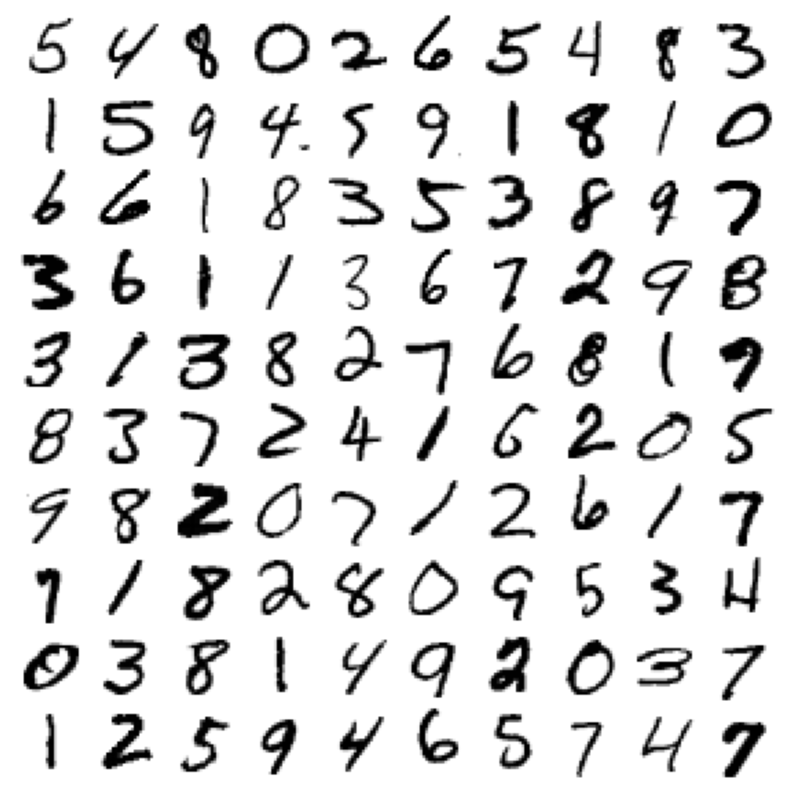

In [5]:
# Функция для отображения изображений
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="binary", **options)
    plt.axis("off")

# Отображение первых 100 изображений
plt.figure(figsize=(10, 10))
example_images = X_train[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

Обучение модели KNN

In [8]:
# Создание модели KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Оценка модели
После обучения модели проверим её точность на тестовых данных.

In [9]:
# Предсказание на тестовых данных
y_pred = knn_clf.predict(X_test)

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 97.13%


Визуализация предсказаний

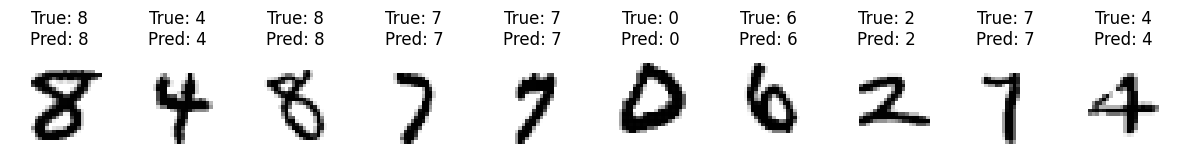

In [13]:
# Функция для отображения изображений с предсказанными и истинными метками
def plot_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="binary")
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis("off")
    plt.show()

# Выбираем первые 10 изображений из тестовой выборки
example_images = X_test[:10]
example_true_labels = y_test[:10].values  # Преобразуем y_test в массив NumPy
example_predicted_labels = y_pred[:10]

# Визуализируем предсказания
plot_predictions(example_images, example_true_labels, example_predicted_labels)

Влияние параметра K

Точность модели при K=1: 97.20%
Точность модели при K=5: 97.01%
Точность модели при K=10: 96.58%


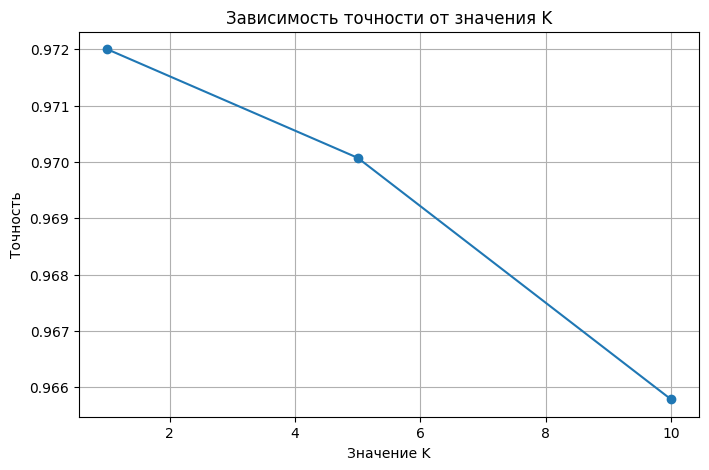

In [18]:
# Список значений K, которые мы хотим исследовать
k_values = [1, 5, 10]

# Словарь для хранения точности для каждого K
accuracy_scores = {}

# Обучаем модели и вычисляем точность для каждого K
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy
    print(f"Точность модели при K={k}: {accuracy * 100:.2f}%")

# Визуализируем результаты
plt.figure(figsize=(8, 5))
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()), marker='o')
plt.xlabel("Значение K")
plt.ylabel("Точность")
plt.title("Зависимость точности от значения K")
plt.grid(True)
plt.show()

При малых k модель склонна к переобучению, и точность на тестовых данных низкая.

При оптимальных  k точность достигает максимума.

При больших k модель недообучается, и точность снижается.

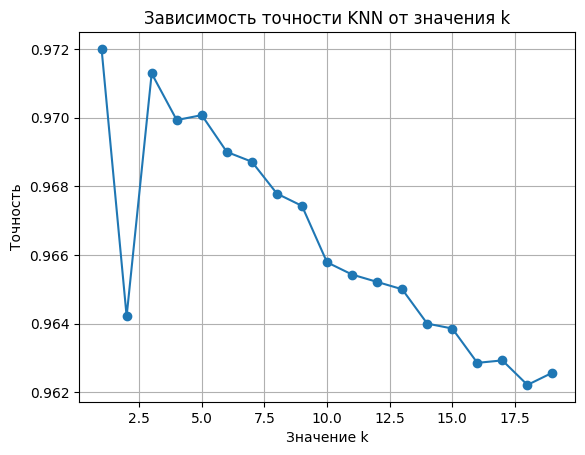

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Список для хранения точности при разных k
k_values = range(1, 20)
accuracies = []

# Перебор значений k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построение графика
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Зависимость точности KNN от значения k')
plt.grid()
plt.show()